## Цель: исследование объявлений о продаже квартир, установление параметров для построения автоматизированной системы, отслеживающей аномалии и мошеннические действия

### Вопросы:
#### 1) Каковы типичные параметры продаваемых квартир (например, площадь, цена)? 
Столбцы: `total_area`, `last_price`, `rooms`
#### 2) Сколько обычно длится процесс продажи?
Столбцы: `days_exposition`
#### 3) Уберите квартиры с очень высокой ценой и другими необычными параметрами. Какие особенности вы обнаружили?
Столбцы: `total_area`, `last_price`, `rooms`
#### 4) Какие факторы больше всего влияют на стоимость квартиры? 
Столбцы: `total_area`, `last_price`, `rooms`, `cityCenters_nearest`
#### 5) Зависит ли цена квадратного метра от числа комнат, этажа, удалённости от центра и даты размещения
Столбцы: `price_sqm`, `last_price`, `total_area`, `floor`, `rooms`, `cityCenters_nearest`, `first_day_exposition`
#### 6) Что можно сказать о цене квадратного метра в пригородах? 
Столбцы: `price_sqm`, `locality_name`
#### 7) Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.
Столбцы: `total_area`, `floor`, `rooms`, `cityCenters_nearest`, `locality_name`
#### 8) Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.
Столбцы: `is_apartment`, `studio`, `open_plan`, `last_price`, `building_series_id`

### Задание 1. Начало исследования

#### Шаг 1. Открываю файл с данными и изучаю общую информацию

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
pd.options.display.max_rows = 100

In [5]:
pd.options.display.max_columns = 35

In [6]:
data.head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,area,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,1564812,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,108.0,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,NaN,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,40.4,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,Сталинский,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,56.0,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,NaN,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,159.0,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,NaN,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,100.0,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [7]:
data.sample()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,area,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
478,1568663.0,3,3290000.0,43.8,2018-01-12T00:00:00,2,2.5,5.0,28.4,1,NaN,False,43.8,False,5.0,NaN,посёлок Шушары,12104.0,17891.0,0.0,NaN,0.0,NaN,309.0


In [8]:
data.tail()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,area,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,1564812.0,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,133.81,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,NaN,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,59.00,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,NaN,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,56.70,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,NaN,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,76.75,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,NaN,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,32.30,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Провожу осмотр данных. Подозрительные максимумы и минимумы в `last_price` и `ceiling_height`, максимум в `floors_total`	

In [9]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,area,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,60.348651,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,35.654083,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,12.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,40.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,52.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,69.900000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,900.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      6517 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000

#### Шаг 2. Подготовка данных

Удаляю дублирующий столбец `area`

In [11]:
data = data.drop('area', axis = 1)

Перевожу в `int` значения всех столбцов, где нет пропусков, и, где единицы измерения подразумевают целые числа.

In [12]:
l = ['floors_total', 'last_price', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 
     'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']
for i in l:
    if data[i].isnull().sum() == 0:
        data[i] = data[i].astype('int')

Пропуски

In [13]:
data.isnull().sum()

building_series_id      17182
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Срок размещения объявления

In [14]:
data['days_exposition'].isnull().sum()

3181

Чтобы заполнить часть пропусков `days_exposition`, я использую медиану, сгруппированную по количеству комнат и населенному пункту.

Среднее значение `days_exposition` сгруппированное по населенному пункту и количеству комнат

In [15]:
days_mean = data.groupby(['locality_name', 'rooms'])['days_exposition'].mean()

Добавление нового столбца со средним значением

In [16]:
data = data.merge(days_mean, on=['locality_name', 'rooms'], how='left', suffixes=('', '_mean'))

Замена пропусков в `days_exposition` средним значением

In [17]:
data.loc[data['days_exposition'].isnull(), 'days_exposition'] = \
data.loc[data['days_exposition'].isnull(), 'days_exposition_mean']

Проверяю результат

In [18]:
data.head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,days_exposition_mean
0,1564812,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,205.682029,205.682029
1,NaN,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.000000,147.988372
2,Сталинский,10,5196000,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.000000,170.942614
3,NaN,0,64900000,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.000000,205.682029
4,NaN,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.000000,170.942614


Оставшиеся пропуски заменяю средним значением по столбцу

In [19]:
data['days_exposition'].isna().sum()

138

In [20]:
mean = data['days_exposition'].mean()
data['days_exposition'] = data['days_exposition'].fillna(mean)

Удаляю столбец `days_exposition_mean`

In [21]:
data = data.drop('days_exposition_mean', axis = 1)

Серия домов

In [22]:
data['building_series_id'].value_counts()

1564812.0                  2807
1564812                     998
1564792.0                   374
1564801.0                   311
1564806.0                   175
1568627.0                   144
1564792                     133
1569071.0                   133
1564796.0                   116
1564801                      92
1569033.0                    87
1564806                      67
1569038.0                    62
Кирпичный                    60
1568627                      52
Кирп.Монолит                 47
1569066.0                    46
1564796                      44
1569071                      40
1568734.0                    37
1569033                      32
1568675.0                    28
1568643.0                    26
1569054.0                    24
1569038                      23
1569088.0                    23
Старый фонд с КР             22
Старый фонд                  22
137 серия                    21
137                          19
Панельный                    18
1568653.

Удаляю дубликаты

In [23]:
data['building_series_id'] = data['building_series_id'].str.lower()
data['building_series_id'].replace(regex=True,inplace=True,to_replace=r'.0',value=r'') 
data['building_series_id'] = data['building_series_id'].replace('137 серия','137') 
data['building_series_id'] = data['building_series_id'].replace('6 серия','6')
data['building_series_id'] = data['building_series_id'].replace('4 серия','4') 
data['building_series_id'] = data['building_series_id'].replace('0.11 серия','0.11') 
data['building_series_id'] = data['building_series_id'].replace('старый фонд + капремонт','старый фонд с кр')
data['building_series_id'] = data['building_series_id'].replace('кирп.монолит','кирпичный монолит') 
data['building_series_id'] = data['building_series_id'].replace(['121 гатчинская', '121 (гатчинская)'],'121(гатчинская)') 
data['building_series_id'] = data['building_series_id'].replace(['индивид.', 'индивидуальный'],'индивидуальный проект') 
data.groupby('building_series_id')['total_area'].count()

building_series_id
0                           5
0.11                        8
1 лг - 0.11                 1
1-335-1                     1
1-528 кп - 2                1
1-528-кп-97                 1
1-лг-0-i                    1
12                          1
121                         4
121(гатчинская)             7
13                          2
137                        40
14                          1
15                          2
15633                     119
15638                      85
15641                     424
15646                     242
1564792                   507
1564796                   160
15648                      12
1564812                  3805
15654                      32
15661                      17
15666                      61
15671                     173
15675                       9
15679                       7
15680                      14
15686                      14
1568627                   196
1568643                    30
1568653              

Была гипотеза, что можно восстановить часть значений `building_series_id`, исходя из `rooms`, `total_area` и `floors_total`. Но при осмотре данных я не увидел прямой связи этих значений. Многие квартиры с пропусками `building_series_id` уникальны.

In [24]:
data[data['building_series_id'].isnull()].head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,NaN,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
3,NaN,0,64900000,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,NaN,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,NaN,10,2890000,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,NaN,6,3700000,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


Значения `building_series_id` не играют большой роли в дальнейшем. Поэтому заменяю пропуски на `unknown`. Удалять эти строки нельзя, потому что они составляют больше половины датасета

In [25]:
data['building_series_id'] = data['building_series_id'].fillna('unknown')

Высота потолков

In [26]:
data['ceiling_height'].isnull().sum()

9195

Подозрительные очень маленькие(1 метр) и очень большие значения(100 метров)

In [27]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Функция для построения гистограмм по выбранному срезу данных

In [28]:
def query_hist(condition, column, bins):
    return data.query(condition).hist(column, bins=bins)

Графики для подозрительных значений больше 5 метров и меньше 2.5

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fead4ec3898>]],
      dtype=object)

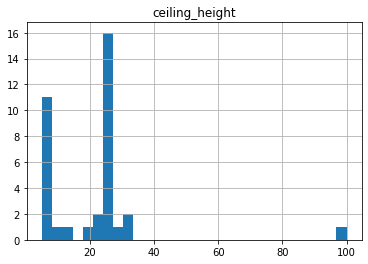

In [29]:
query_hist('ceiling_height > 5', 'ceiling_height', 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fead4df00b8>]],
      dtype=object)

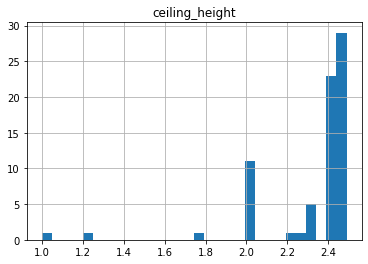

In [30]:
query_hist('ceiling_height < 2.5', 'ceiling_height', 30)

Нет связи между серией дома и высотой потолков

In [31]:
data.pivot_table(index = ['building_series_id', 'rooms'], values = 'ceiling_height', aggfunc = 'min')

ceiling_height
building_series_id    rooms                
0                     3                2.55
0.11                  2                2.60
                      3                2.56
1 лг - 0.11           4                2.53
1-335-1               2                2.55
1-528 кп - 2          1                2.50
1-528-кп-97           1                2.50
1-лг-0-i              1                2.70
121                   1                2.50
                      3                2.55
121(гатчинская)       2                2.55
                      3                2.50
137                   1                2.60
                      2                2.50
                      3                2.60
                      4                2.50
15633                 1                2.50
                      2                2.50
                      3                2.50
                      4                2.50
15638                 1                2.50
                      2                2.50
                      3                2.50
15641                 1                2.50
                      2                2.40
                      3                2.50
                      4                2.50
                      5                2.50
15646                 1                2.50
                      2                2.50
                      3                2.50
                      4                2.50
1564792               1                2.50
                      2                1.00
                      3                2.50
                      4                2.50
                      5                2.50
                      6                2.70
1564796               0                2.80
                      1                2.50
                      2                2.50
                      3                2.45
                      4                2.50
                      5                2.70
15648                 1                2.50
                      2                2.50
1564812               0                2.60
                      1                2.40
                      2                2.45
                      3                2.00
...                                     ...
4                     3                2.50
                      4                2.50
4д                    1                2.60
6                     1                2.50
                      2                2.60
                      3                2.70
7141                  1                2.65
                      2                2.70
                      3                2.80
unknown               0                2.50
                      1                1.75
                      2                1.20
                      3                2.00
                      4                2.40
                      5                2.50
                      6                2.55
                      7                2.70
                      8                2.90
                      9                3.00
                      10               3.15
                      12               2.80
                      15               3.50
блочный               1                2.55
брежневка             3                2.50
г-24                  4                2.50
г-2и                  4                2.55
индивидуальный проект 1                2.65
                      2                2.53
                      3                3.00
                      4                3.00
                      5                3.00
итп                   4                2.95
кирпичный             1                2.50
                      2                2.50
                      3                2.50
кирпичный монолит     1                2.70
                      2                2.62
монолит               2                3.10
од-6                  1  

Заменяю на моду пропуски и значения меньше 2.5 метра и больше 5.

In [32]:
mode_ceiling = data['ceiling_height'].mode()
data.loc[data['ceiling_height'] < 2.50, 'ceiling_height'] = mode_ceiling
data.loc[data['ceiling_height'] > 5, 'ceiling_height'] = mode_ceiling

In [33]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.5)

Количество этажей

In [34]:
data['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

Эксперты сообщают, что в самом высоком жилом здании Санкт-Петербурга 37 этажей. Неудалось исправить ошибочные значения по другим столбцам, поэтому удаляю строки.

In [35]:
data.query('floors_total > 37')

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,unknown,12,3800000,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,NaN,False,False,7.4,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,unknown,9,3978000,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,NaN,False,False,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


In [36]:
data = data.query('floors_total <= 37')

Почти все пропуски в домах с неизвестной серией. Единых значений в пределах одной серии также нет. Пропусков очень мало(0.3%), поэтому я их удаляю.

In [37]:
data = data.dropna(subset=['floors_total'])

Апартаменты

Не обнаружил связи значения `is_apartment` `False` и пропусков с другими значениями. Предположу, что пропуски следует заменить на `False`.

In [38]:
data['is_apartment'].isnull().sum()

20836

In [39]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [40]:
data[(data['is_apartment'].isnull()) & (data['locality_name'] != 'Санкт-Петербург')].head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,unknown,7,3350000,40.40,2018-12-04T00:00:00,1,2.5,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,unknown,10,2890000,30.40,2018-09-10T00:00:00,1,2.5,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,unknown,6,3700000,37.30,2017-11-02T00:00:00,1,2.5,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
8,unknown,20,2900000,33.16,2018-05-23T00:00:00,1,2.5,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,unknown,10,3890000,54.00,2016-06-30T00:00:00,2,2.5,5.0,30.00,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0


In [41]:
data[(data['is_apartment'] == False) & (data['locality_name'] != 'Санкт-Петербург')].head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11,unknown,9,3300000,44.0,2018-08-27T00:00:00,2,2.5,5.0,31.0,4,False,False,False,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
42,unknown,13,22000000,161.8,2015-07-08T00:00:00,4,2.8,4.0,80.9,2,False,False,False,17.6,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
50,unknown,1,4500000,48.2,2017-11-13T00:00:00,1,2.7,5.0,25.4,4,False,False,False,9.0,1.0,Пушкин,19841.0,30183.0,1.0,531.0,3.0,330.0,152.0
66,unknown,6,3450000,34.0,2015-12-16T00:00:00,1,2.6,17.0,17.4,8,False,False,False,11.5,2.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,186.0
69,unknown,6,4010000,50.7,2018-09-16T00:00:00,2,2.6,5.0,28.9,5,False,False,False,9.0,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,194.0


In [42]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Населенный пункт

In [43]:
data['locality_name'].isnull().sum()

48

In [44]:
data['locality_name'].value_counts()

Санкт-Петербург                               15650
посёлок Мурино                                  520
посёлок Шушары                                  439
Всеволожск                                      398
Пушкин                                          369
Колпино                                         338
посёлок Парголово                               327
Гатчина                                         307
деревня Кудрово                                 299
Выборг                                          237
Петергоф                                        201
Сестрорецк                                      183
Красное Село                                    176
Кудрово                                         171
деревня Новое Девяткино                         143
Сертолово                                       142
Ломоносов                                       133
Кириши                                          125
Сланцы                                          112
Волхов      

Удаляю дубликаты

In [45]:
data['locality_name'] = data['locality_name'].replace(['поселок Мурино', 'Мурино'],'посёлок Мурино') 
data['locality_name'] = data['locality_name'].replace('Кудрово','деревня Кудрово') 
data['locality_name'] = data['locality_name'].replace('поселок Бугры','посёлок Бугры')
data['locality_name'] = data['locality_name'].replace('городской посёлок Мга','посёлок городского типа Мга')

Пропущенных значений около 0.25%, поэтому я их удаляю.

In [46]:
data = data[data['locality_name'] != 'unknown']

Жилая площадь

In [47]:
data['living_area'].isnull().sum()

1870

Чтобы заполнить часть пропусков `living_area`, я использую медиану, сгруппированную по общей площади и количеству комнат.

In [48]:
grouped = data.groupby(['rooms', 'total_area']) \
              .agg({'living_area': 'median'}) \
              .rename(columns = {'living_area': 'area_median'})


data = data.set_index(['rooms', 'total_area']).join(grouped)

data.loc[data['living_area'].isnull(), 'living_area'] = \
data.loc[data['living_area'].isnull(), 'area_median']

In [49]:
data = data.reset_index(level=['total_area', 'rooms'])

In [50]:
data = data.drop('area_median', axis = 1)

Расстояние до центра города

In [51]:
data['cityCenters_nearest'].isnull().sum()

5509

99% пропусках в пригородах

In [52]:
data.query('locality_name != "Санкт-Петербург" and cityCenters_nearest.isnull()')['rooms'].count()

5449

В 70% пригородов есть пропуски. Поэтому их нельзя удалять

In [53]:
data.query('locality_name != "Санкт-Петербург"')['rooms'].count()

7961

В дальнейшем нам нужны значения `cityCenters_nearest` только в Санкт-Петербурге, поэтому удаляю там строки с пропусками. Их 0.3% от всех значений в городе.

In [54]:
data = data[~((data['locality_name'] == 'Санкт-Петербург') & (data['cityCenters_nearest'].isnull()))]

In [55]:
data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest.isnull()')['rooms'].sum()

0

Цена

Изучаю значения столбца `last_price`, изменил единицу измерения на миллионы.

In [56]:
data['last_price'].describe() / 1000000

count      0.023551
mean       6.517002
std       10.858623
min        0.012190
25%        3.400000
50%        4.630000
75%        6.750000
max      763.000000
Name: last_price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fead4cd71d0>]],
      dtype=object)

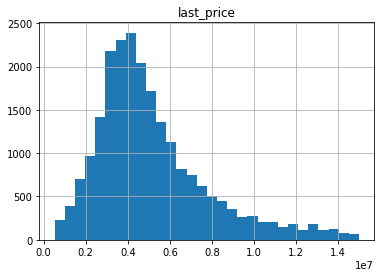

In [57]:
query_hist('500000 < last_price < 15000000', 'last_price', 30)

Исправляю строку со значением 12190

In [58]:
data.loc[data['last_price'] == 12190, 'last_price'] = 12190000

#### Добавление новых столбцов

`price_sqm` c ценой квадратного метра

In [59]:
data['price_sqm'] = data['last_price'] / data['total_area']
data['price_sqm'] = data['price_sqm'].astype('int')

`weekday` - день недели, `month` - месяц и `year` - год публикации объявления

In [60]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [61]:
data['weekday'] = data['first_day_exposition'].dt.dayofweek + 1 #понедельник - первый день недели
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

`floor_type` этаж, на котором расположена квартира; варианты — первый, последний, другой

In [62]:
def floor_type(row):
    floor = row['floor']
    total = row['floors_total']
    if floor == 1:
        return 'первый'
    if  floor == total:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)

`living_area_ratio` соотношение жилой и общей площади и `kitchen_area_ratio` coотношение площади кухни к общей

In [63]:
data['living_area_ratio'] = round(((data['living_area'] / data['total_area']) * 100), 2)
data['kitchen_area_ratio'] = round(((data['kitchen_area'] / data['total_area']) * 100), 2)

### Задание 2. Опиcание выводов

#### 1) Каковы типичные параметры продаваемых квартир (например, площадь, цена)? Укажите наиболее важные характеристики и постройте графики.

In [64]:
data.loc[:, ['total_area', 'last_price', 'rooms', 'cityCenters_nearest']].mode()

,total_area,last_price,rooms,cityCenters_nearest
0,45.0,4500000,1,8460.0


In [65]:
data['total_area'].describe()

count    23551.000000
mean        60.267704
std         35.481348
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

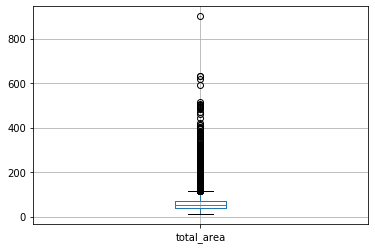

In [66]:
data.boxplot('total_area')

График по срезу без выбросов

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fead4299780>]],
      dtype=object)

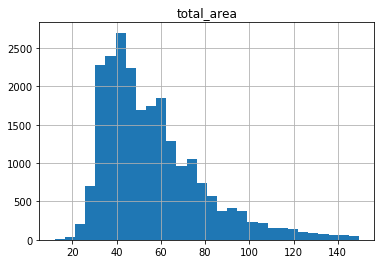

In [67]:
query_hist('total_area < 150', 'total_area', 30)

График по срезу в пределах межквартильного интервала

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fead4287c88>]],
      dtype=object)

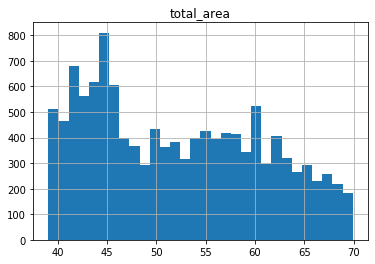

In [68]:
query_hist('39 < total_area < 70', 'total_area', 30)

In [69]:
data['last_price'].describe() / 1000000

count      0.023551
mean       6.517519
std       10.858603
min        0.430000
25%        3.400000
50%        4.630000
75%        6.752530
max      763.000000
Name: last_price, dtype: float64

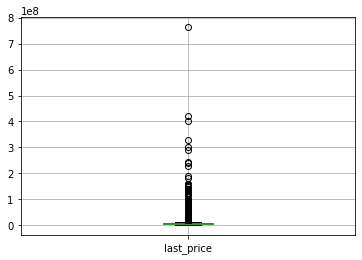

In [70]:
data.boxplot('last_price')

График распределения цены по срезу, ограниченному третьим квартилем

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feaaf340438>]],
      dtype=object)

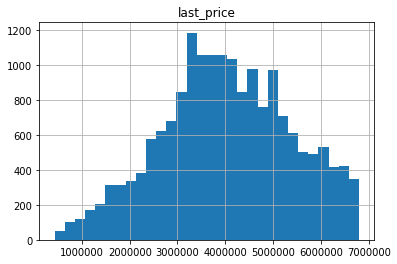

In [71]:
query_hist('last_price < 6800000', 'last_price', 30)

In [72]:
data['cityCenters_nearest'].describe()

count    18102.000000
mean     14183.200475
std       8610.606110
min        181.000000
25%       9233.250000
50%      13093.000000
75%      16285.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

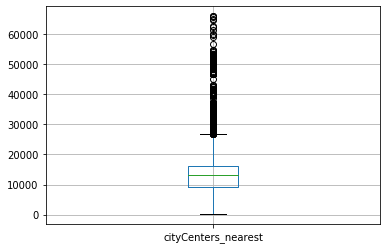

In [73]:
data.boxplot('cityCenters_nearest')

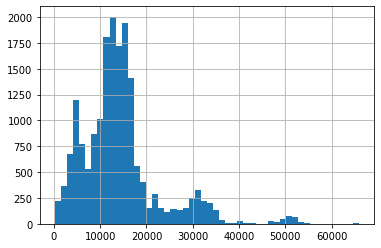

In [74]:
data['cityCenters_nearest'].hist(bins=50)

Вывод: при покупке квартиры люди в первую очередь обращают внимание на цену, общую площадь, количество комнат и расположение. В датасете больше всего двухкомнатных квартир площадью 45 кв.м. в доме типовой застройки на старой окраине города. Цена 4500000, что примерно соответствует медиане.

#### 2) Сколько обычно длится процесс продажи? 

In [75]:
data.query('days_exposition > 0')['days_exposition'].describe()

count    23551.000000
mean       182.028976
std        205.714407
min          1.000000
25%         45.000000
50%        119.750000
75%        218.000000
max       1580.000000
Name: days_exposition, dtype: float64

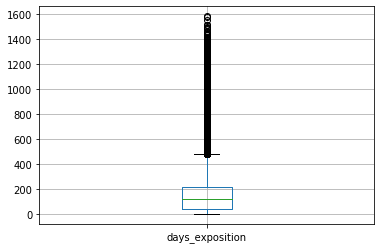

In [76]:
data.boxplot('days_exposition')

Медианное значение `days_exposition` сгруппированное по количеству комнат

In [77]:
data.pivot_table(index = 'rooms', values = 'days_exposition', aggfunc = 'median')

,days_exposition
rooms,
0,57.000000
1,96.000000
2,115.000000
3,155.000000
4,214.500000
5,268.000000
6,285.605634
7,208.000000
8,303.000000


In [78]:
x = data.pivot_table(index = 'rooms', values = 'days_exposition', aggfunc = 'median')

In [79]:
x = x.reset_index()

Добавляю в pivot_table среднее значение `days_exposition` для квартир с более шестью комнатами

In [80]:
mean_7_19 = x.query('rooms > 6')['days_exposition'].mean()
print(mean_7_19)

368.7


In [81]:
d = pd.DataFrame({'rooms':[20], 'days_exposition':[mean_7_19]})

In [82]:
x = x.query('rooms < 7')

In [83]:
x = x.append(d, ignore_index = True)

График среднего срока экспозиции квартиры в зависимости от количества комнат. Крайний правый столбец содержит данные о квартирах с более чем шестью комнатами.

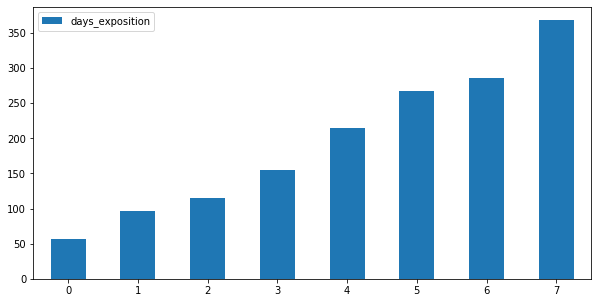

In [84]:
x.plot(y = 'days_exposition', kind = 'bar', rot = 0, figsize = (10, 5))

Вывод: наблюдается прямая зависимость между количеством комнат и длительностью экспонирования. Значительно возрастает для многокомнатных квартир с более шестью комнатами.

#### 3) Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.

Исследую значения `last_price`, изменил единицу измерения на миллионы.

In [85]:
data['last_price'].describe() / 1000000

count      0.023551
mean       6.517519
std       10.858603
min        0.430000
25%        3.400000
50%        4.630000
75%        6.752530
max      763.000000
Name: last_price, dtype: float64

Много выбросов от уровня 15-20 млн

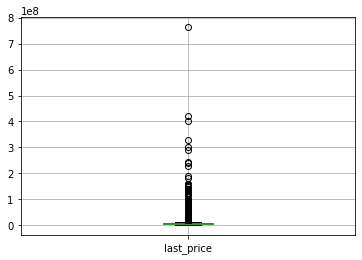

In [86]:
data.boxplot('last_price')

На уровне 15 млн значения приближаются к 0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feaaef9b668>]],
      dtype=object)

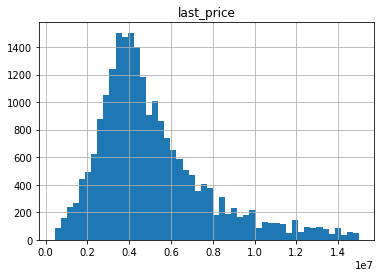

In [87]:
query_hist('last_price < 15000000', 'last_price', 50)

Сверхвысокие значения составляют 5%

In [88]:
1 - len(data.query('last_price < 15000000')) / len(data)

0.052014776442613875

Хотя сверхвысоких значений мало, они оказывают влияние на среднее значение - 5.1 млн в срезе без выбросов и 6.4 млн по всей выборке

In [89]:
data.query('last_price < 15000000')['last_price'].describe() / 1000000

count     0.022326
mean      5.137278
std       2.680536
min       0.430000
25%       3.350000
50%       4.500000
75%       6.299000
max      14.999999
Name: last_price, dtype: float64

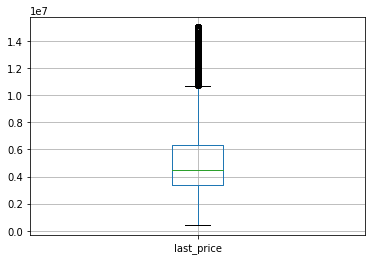

In [90]:
data.query('last_price < 15000000').boxplot('last_price')

Почти все дорогие квартиры расположены в Санкт-Петербурге, из пригородов выделяется город Пушкин

In [91]:
data.query('last_price > 15000000')['locality_name'].value_counts()

Санкт-Петербург     1143
Пушкин                18
Сестрорецк             6
Зеленогорск            2
посёлок Стрельна       2
Петергоф               2
Красное Село           1
деревня Бор            1
Кронштадт              1
Выборг                 1
Колпино                1
посёлок Репино         1
Всеволожск             1
Name: locality_name, dtype: int64

Медианное расстояние от центра для сверхдорогих квартир в 2 с лишним раза меньше, чем значение по выборке

In [92]:
data.query('last_price > 15000000')['cityCenters_nearest'].median()

5733.0

In [93]:
data['cityCenters_nearest'].median()

13093.0

Изучаю значения `total_area`

In [94]:
data['total_area'].describe()

count    23551.000000
mean        60.267704
std         35.481348
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Много выбросов от 150 кв.м

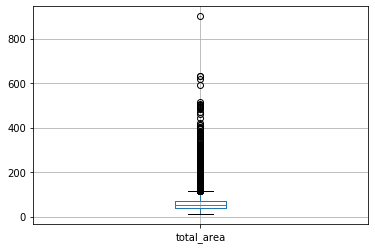

In [95]:
data.boxplot('total_area')

На уровне 150 кв.м значения приближаются к 0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feaaef87a58>]],
      dtype=object)

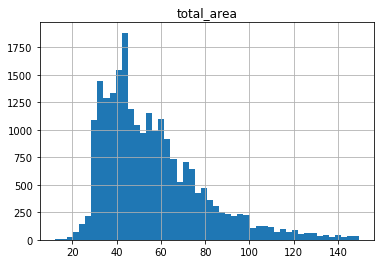

In [96]:
query_hist('total_area < 150', 'total_area', 50)

Сверхвысоких значений около 2%

In [97]:
1 - len(data.query('total_area < 150')) / len(data)

0.024202793936563216

Медианное расстояние от центра для квартир большой площади в 2 с лишним раза меньше, чем значение по выборке

In [98]:
data.query('total_area > 150')['cityCenters_nearest'].median()

5243.0

In [99]:
data['cityCenters_nearest'].median()

13093.0

Изучаю значения `rooms`

In [100]:
data['rooms'].describe()

count    23551.000000
mean         2.070528
std          1.077227
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Некоторое количество выбросов от 6 комнат

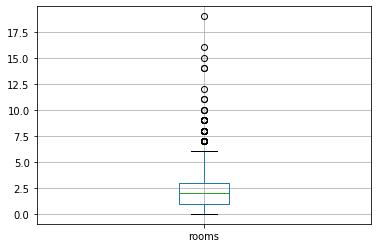

In [101]:
data.boxplot('rooms')

На уровне 6 комнат значения приближаются к 0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feaaede8e48>]],
      dtype=object)

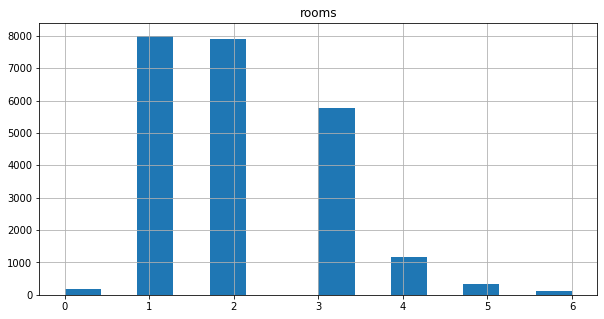

In [102]:
data.query('rooms < 7').hist('rooms', bins=14, figsize=(10,5))

Квартир с более шестью комнатами около 0.3%

In [103]:
1 - len(data.query('rooms < 7')) / len(data)

0.0037365716954693706

Вывод: в столбце `last_price` сверхвысокие значения превышающие 15000000 рублей составляют 5%. В столбце `total_area` сверхвысокие значения превышающие 150 кв.м. составляют 2%. В столбце `rooms` сверхвысокие значения превышающие 6 комнат составляют 0.35%. Квартиры со сверхвысокими значениями `last_price` и `total_area` расположены преимущественно в центре города.

#### 4) Какие факторы больше всего влияют на стоимость квартиры? 

In [104]:
factors = [
    'last_price', 'total_area', 'rooms', 
    'floor', 'cityCenters_nearest', 'ceiling_height', 
    'floors_total', 'price_sqm', 'living_area_ratio', 
    'kitchen_area_ratio', 'weekday', 'month', 'year'
]
data.loc[:, factors].corr().sort_values(by = 'last_price', ascending=False)['last_price']

last_price             1.000000
price_sqm              0.736401
total_area             0.651513
rooms                  0.362094
ceiling_height         0.260153
floor                  0.027283
living_area_ratio      0.003323
month                  0.002385
weekday                0.001889
floors_total          -0.005869
year                  -0.043869
kitchen_area_ratio    -0.089468
cityCenters_nearest   -0.206275
Name: last_price, dtype: float64

Вывод: на стоимость квартиры влияют цена квадратного метра(корреляция 0.73), общая площадь(0.64), количество комнат(0.36).

#### 5) Зависит ли цена квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года?

In [105]:
def first_floor(x):
    if x == 'первый':
        return True
    else:
        return False
data['first_floor'] = data['floor_type'].apply(first_floor)

In [106]:
def last_floor(x):
    if x == 'последний':
        return True
    else:
        return False
data['last_floor'] = data['floor_type'].apply(last_floor)

In [107]:
factors = [
    'price_sqm', 'rooms', 'first_floor', 
    'last_floor', 'cityCenters_nearest', 
    'weekday', 'month', 'year'
]
data.loc[:, factors].corr().sort_values(by = 'price_sqm', ascending=False)['price_sqm']

price_sqm              1.000000
rooms                  0.055251
year                   0.007308
month                 -0.001664
weekday               -0.007277
last_floor            -0.047856
first_floor           -0.129426
cityCenters_nearest   -0.317500
Name: price_sqm, dtype: float64

Вывод: цена квадратного метра зависит от расстояния от центра города(корреляция -0.31)

#### 6) Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом объявлений.

In [108]:
(data.pivot_table(index = 'locality_name', values = 'price_sqm', aggfunc = ('count', 'median'))
     .sort_values('count', ascending = False)
     .head(11)
)

,count,median
locality_name,,
Санкт-Петербург,15590.0,104705.0
посёлок Мурино,586.0,86249.5
деревня Кудрово,470.0,95555.0
посёлок Шушары,439.0,76829.0
Всеволожск,398.0,65789.0
Пушкин,369.0,100000.0
Колпино,338.0,74723.5
посёлок Парголово,327.0,91642.0
Гатчина,307.0,67796.0


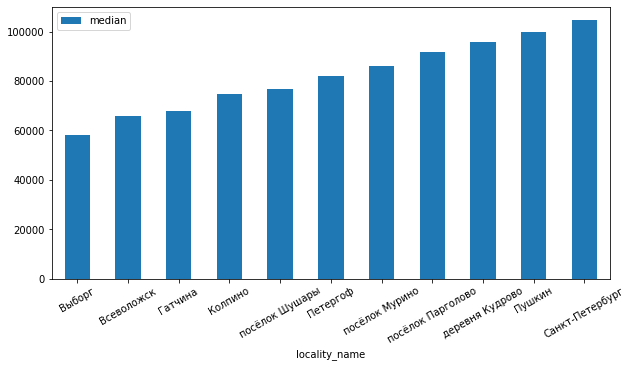

In [109]:
x = data.pivot_table(index = 'locality_name', values = 'price_sqm', 
                     aggfunc = ('count', 'median')).sort_values('count', ascending = False).head(11)
x.sort_values('median').plot(y='median', kind='bar', rot=30, figsize=(10, 5))

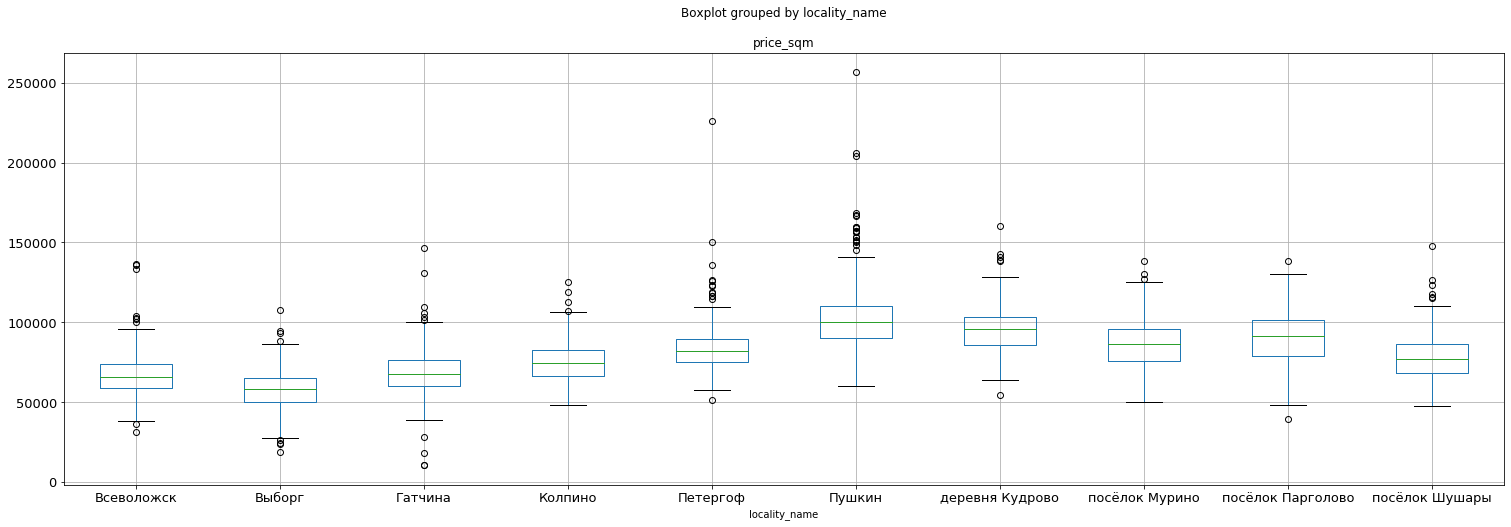

In [110]:
names = list(x.index)
data.query('locality_name in @names and locality_name != "Санкт-Петербург" and price_sqm < 300000') \
    .boxplot('price_sqm', by='locality_name', figsize=(25,8), fontsize = 13)

Вывод: медианная цена квадратного метра в городе Пушкин сопоставима с медианой в Санкт-Петербурге, хотя он достаточно удален от центра. Возможно, это можно объяснить престижностью направления(при анализе цен я отметил, что в Пушкине много квартир с высокой стоимостью, относительно пригородов). На 5-15% дешевле спальные районы - Мурино, Кудрово, Парголово. В удаленных городах Ленинградской области квадратный метр дешевле на 35-40%(Выборг, Гатчина, Всеволжск). 

#### 7) Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.

Исследую распределение квартир в Санкт-Петербурге в зависимости от цены и расстояния от центра

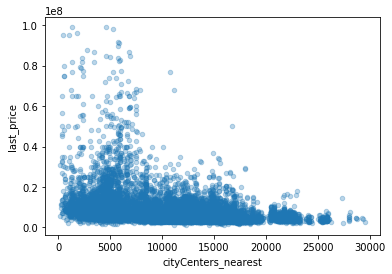

In [111]:
data.query('locality_name == "Санкт-Петербург" and last_price < 100000000') \
    .plot(x = 'cityCenters_nearest', y = 'last_price', kind = 'scatter', alpha = 0.3)

На основе графика распределения определяю границу центра 8000 метров. Создаю новый столбец со значениями True для квартир в центре и False - вне центра.

In [112]:
spb = data[data['locality_name']== "Санкт-Петербург"]
def center(x):
    if x < 8000:
        return True
    else:
        return False
spb['center'] = spb['cityCenters_nearest'].apply(center)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


График распределения квартир вне центра по количеству комнат и общей площади. Более темные участки означают большее количество объявлений

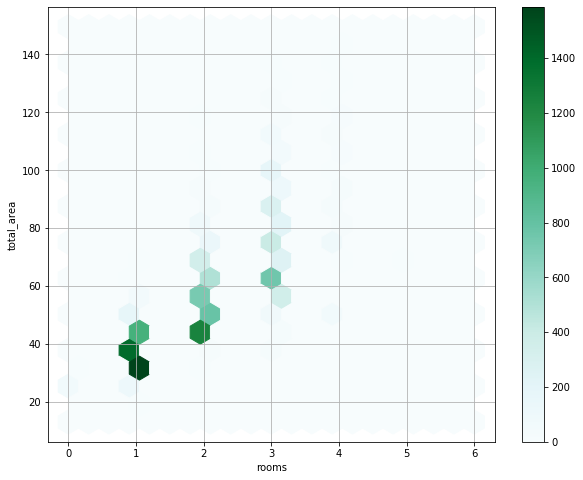

In [113]:
spb.query('rooms < 7 and total_area < 150 and center == False') \
.plot(x='rooms', y='total_area', kind='hexbin', gridsize=20, figsize=(10, 8), sharex=False, grid=True)

На основе графика распределения hexbin выделяю три сегмента квартир вне центра:
<ol>
<li>Однокомнатные квартиры площадью 30-40 метров</li>
<li>Двухкомнатные квартиры площадью 40-50 метров</li>
<li>Трехкомнатные квартиры площадью 60-80 метров</li>
</ol>   

In [114]:
out1 = spb.query('rooms == 1 and 30 < total_area < 40 and center == False')
len(out1)

2533

In [115]:
out2 = spb.query('rooms == 2 and 40 < total_area < 50 and center == False')
len(out2)

1464

In [116]:
out3 = spb.query('rooms == 3 and 60 < total_area < 80 and center == False')
len(out3)

1219

График распределения квартир в центре по количеству комнат и общей площади. Более темные участки означают большее количество объявлений

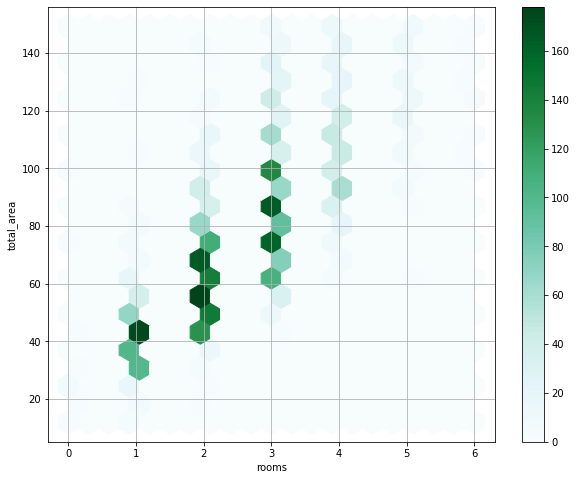

In [117]:
spb.query('rooms < 7 and total_area < 150 and center == True') \
.plot(x='rooms', y='total_area', kind='hexbin', gridsize=20, figsize=(10, 8), sharex=False, grid=True)

На основе графика распределения hexbin выделяю два сегмента квартир в центре:
<ol>
<li>Двухкомнатные квартиры площадью 35-100 метров</li>
<li>Трехкомнатные квартиры площадью 60-150 метров</li>
</ol>   

In [118]:
in2 = spb.query('rooms == 2 and 35 < total_area < 100 and center == True')
len(in2)

1041

In [119]:
in3 = spb.query('rooms == 3 and 60 < total_area < 150 and center == True')
len(in3)

1008

In [120]:
type(in3)

pandas.core.frame.DataFrame

Функция для построения графика корреляции основных факторов по выбранному значению

In [121]:
def corr_bar(data, value):
    """
data - датафрейм
value - столбец со значениями, по которым сранивается корреляция

Делаю срез по основным факторам, сортирую по value, строю график
"""
    return data.loc[:, [
        'last_price', 'total_area', 'floor', 
        'cityCenters_nearest', 'ceiling_height', 'floors_total', 
        'price_sqm', 'living_area_ratio', 'kitchen_area_ratio', 
        'weekday', 'month', 'year'
    ]
                   ].corr() \
                    .sort_values(by = value, ascending=False)[value] \
                    .plot(kind = 'bar', rot=30, figsize = (10, 5))

Строю графики корреляции основных факторов с ценой по всем сегментам и по всей выборке

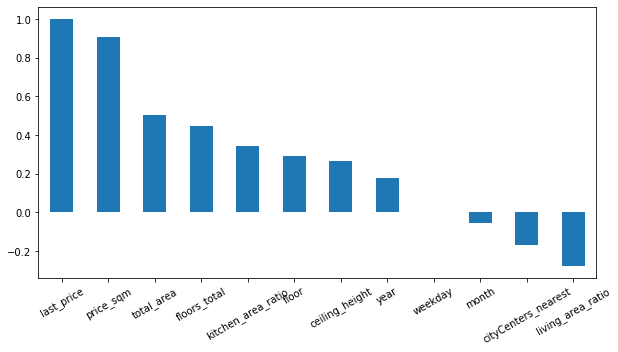

In [122]:
corr_bar(out1, 'last_price')

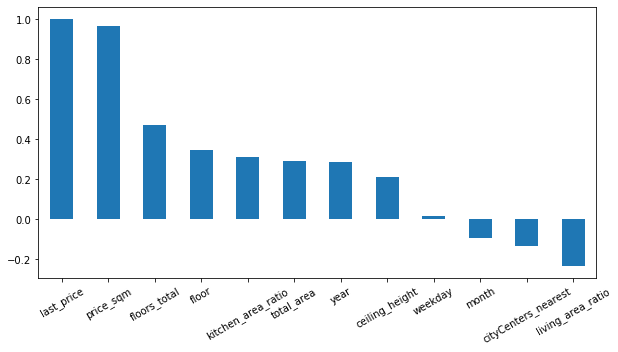

In [123]:
corr_bar(out2, 'last_price')

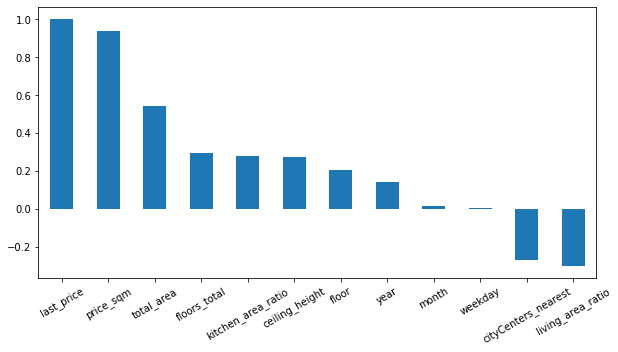

In [124]:
corr_bar(out3, 'last_price')

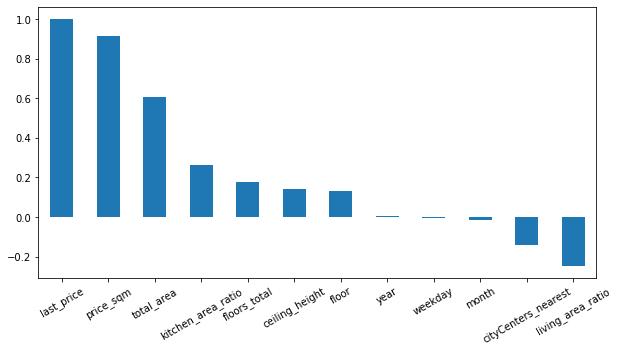

In [125]:
corr_bar(in2, 'last_price')

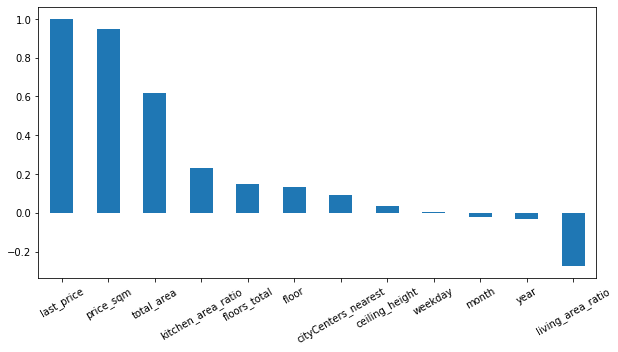

In [126]:
corr_bar(in3, 'last_price')

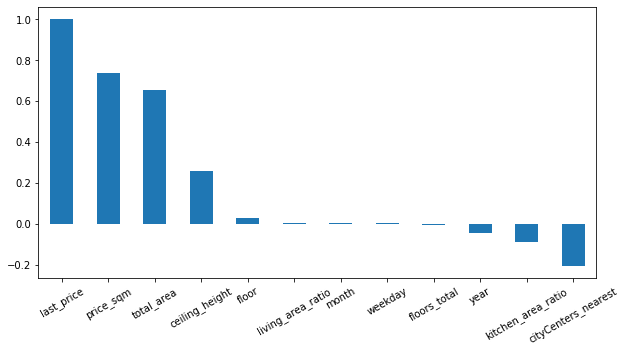

In [127]:
corr_bar(data, 'last_price')

<p>Вывод: граница центра была определена, как 8000 метров, что соответствует локализации дорогих квартир. С другой стороны, 8000 метров это слишком большое расстояние для Санкт-Петербурга и вряд ли соответствует представлениям о центре города, но выделение меньшей области не позволяло создавать сегменты размером более 1000 объявлений в центре.</p>
Было выделено пять сегментов:
<ol>
<li>Однокомнатные квартиры вне центра площадью 30-40 метров - на стоимость квартиры влияют цена квадратного метра(корреляция 0.90), общая площадь(0.50), количество этажей(0.44), соотношение жилой площади к общей площади(-0.40)</li>
<li>Двухкомнатные квартиры вне центра площадью 40-50 метров - на стоимость квартиры влияют цена квадратного метра(корреляция 0.96), количество этажей(0.47), этаж(0.40)</li>
<li>Трехкомнатные квартиры вне центра площадью 60-80 метров - на стоимость квартиры влияют цена квадратного метра(корреляция 0.93), общая площадь(0.54), соотношение жилой площади к общей площади(-0.42)</li>
<li>Двухкомнатные квартиры в центре площадью 35-100 метров - на стоимость квартиры влияют цена квадратного метра(корреляция 0.91), общая площадь(0.60), соотношение жилой площади к общей площади(-0.44)</li>
<li>Двухкомнатные квартиры в центре площадью 60-150 метров - на стоимость квартиры влияют цена квадратного метра(корреляция 0.94), общая площадь(0.61)</li>
</ol>
Для всех сегментов характерна большая зависимость стоимости квартиры от цены квадратного метра, чем по всему датасету(0.90 против 0.73). Второй сегмент выделяется большим влияние этажа(0.40)

#### 8) Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.

Характерные параметры: цена кв.м., общая площадь, цена, расстояние от центра, этаж

In [128]:
values = ['price_sqm', 'total_area', 'last_price', 'cityCenters_nearest', 'floor']

Медианные значения характерных параметров для апартаментов, сгруппированные по количеству комнат

In [129]:
data[data['is_apartment'] == True].pivot_table(index='rooms', values=values, aggfunc='median')

,cityCenters_nearest,floor,last_price,price_sqm,total_area
rooms,,,,,
1,20802.0,3,4839500,113866.5,44.95
2,16442.0,3,7500000,116900.0,70.00
3,9436.0,4,9548629,105878.0,99.00
4,NaN,2,4000000,40816.0,98.00
5,5735.0,7,84000000,165680.0,507.00
7,3876.0,2,13490000,134095.0,100.60


Функция корреляции основных параметров квартиры со значениями выбранного столбца в рамках выбранного среза

In [130]:
def corr_column(column, column_value, column_corr):
    """
    column - столбец по которому делается срез 
    column_value - значения столбца для среза
    column_corr - столбец по которому сравнивается корреляция
    """
    values = ['price_sqm', 'total_area', 'last_price', 'cityCenters_nearest', 'floor', 'rooms']
    return data[data[column] == column_value].loc[:, values].corr() \
    .sort_values(by = column_corr, ascending=False)[column_corr]

Корреляция основных параметров апартаментов с ценой

In [131]:
corr_column('is_apartment', True, 'last_price')

last_price             1.000000
total_area             0.810846
price_sqm              0.565047
rooms                  0.399182
floor                  0.119855
cityCenters_nearest   -0.447814
Name: last_price, dtype: float64

Медианные значения характерных параметров для студий, сгруппированные по количеству комнат

In [132]:
data[data['studio'] == True].pivot_table(index='rooms', values=values, aggfunc='median')

,cityCenters_nearest,floor,last_price,price_sqm,total_area
rooms,,,,,
0,14069.0,7,2800000,107129,26.0
1,14640.0,8,2650000,100384,27.0


Корреляция основных параметров студий с ценой

In [133]:
corr_column('studio', True, 'last_price')

last_price             1.000000
total_area             0.853751
price_sqm              0.595268
floor                 -0.049325
rooms                 -0.051094
cityCenters_nearest   -0.442744
Name: last_price, dtype: float64

Медианные значения характерных параметров для квартир свободной планировки, сгруппированные по количеству комнат

In [134]:
data[data['open_plan'] == True].pivot_table(index = 'rooms', values = values, aggfunc='median')

,cityCenters_nearest,floor,last_price,price_sqm,total_area
rooms,,,,,
0,13222.0,8.0,2600000,104285,26.10
1,13186.5,2.0,3800000,97435,39.00
2,NaN,10.0,3350000,65686,51.00
3,18113.5,2.5,4745000,76449,61.75
4,4811.0,2.0,12000000,123456,97.20
5,7101.0,5.0,48763000,310592,157.00


Корреляция основных параметров квартир свободной планировки с ценой

In [135]:
corr_column('open_plan', True, 'last_price')

last_price             1.000000
total_area             0.959663
price_sqm              0.661933
rooms                  0.388753
floor                 -0.084180
cityCenters_nearest   -0.298290
Name: last_price, dtype: float64

Медианные значения характерных параметров для квартир типовой серии 1564812, сгруппированные по количеству комнат

In [136]:
data[data['building_series_id'] == '1564812'] \
.pivot_table(index = 'rooms', values = values, aggfunc='median')

,cityCenters_nearest,floor,last_price,price_sqm,total_area
rooms,,,,,
0,12730.0,7.0,3415000,130967.5,26.00
1,13452.5,5.0,4415000,117567.0,38.00
2,11357.5,4.0,6574500,112930.0,58.00
3,9579.5,4.0,8510000,107045.5,80.75
4,4994.5,4.0,11200000,101270.5,109.00
5,4542.0,4.0,14990000,106361.0,149.00
6,4542.0,3.0,16650000,99411.0,168.60
7,3763.0,4.0,22725000,111580.0,199.65
9,9987.0,3.0,23500000,89035.0,250.00


Корреляция основных параметров квартир типовой планировки 1564812 с ценой

In [137]:
corr_column('building_series_id', '1564812', 'last_price')

last_price             1.000000
price_sqm              0.732695
total_area             0.679517
rooms                  0.446728
floor                 -0.006799
cityCenters_nearest   -0.249228
Name: last_price, dtype: float64

Вывод: наиболее характерными параметрами цену, общую площадь, количество комнат и расположение. 
<ol>
<li>Апартаменты - на стоимость квартиры влияют общая площадь(корреляция 0.81), цена квадратного метра(0.56), количество комнат(0.48), и расстояние от центра(-0.44)</li>
<li>Студии - на стоимость квартиры влияют общая площадь(корреляция 0.85), цена квадратного метра(0.59) и расстояние от центра(-0.44)</li>
<li>Свободная планировка - на стоимость квартиры влияют общая площадь(корреляция 0.89), цена квадратного метра(0.77) и количество комнат (0.73)</li>
<li>Массовая типовая планировка 1564812 - на стоимость квартиры влияют цена квадратного метра(корреляция 0.73), общая площадь(0.67) и количество комнат (0.44)</li>
</ol>
Основным отличие типовой планировки является преимущественное влияние цены квадратного метра. Для остальных типов жилья этим фактором будет общая площадь. Цена апартаментов и студии больше других зависит от расстоянии от центра. А на стоимость квартир свободной планировки большое влияние оказывает количество комнат.

### Общий вывод:
#### Предобработка:
- Отсутствующие значения о сроке размещения объявления были заменены средним сгруппированным по населенному пункту и количеству комнат(около 3000 значений), оставшиеся 4.5% пропусков заменены средним значением по выборке.
- Пропущенные значения серии дома были заменены на `unknown`(16692 значения), исправлены дубликаты. 
- Отдельные ошибочные значения о высоте потолков заменены на самые частотные или близкие, пропуски заменены на самое частотное значение. 
- Удалены пропуски этажности(0.3%). 
- Пропуски в апартаментах заменены на значение `False`. 
- Исправлены дубликаты в значениях населенных пунктов, удалены пропуски(0.25%). 
- В значениях жилой площади 88% пропусков заполнены медианой сгруппированной по общей площади и количеству комнат. 
- Удалены пропуски расстояния до центра в Санкт-Петербурге(0.3%) 

Всё это может оказывать незначительное воздействие на финальные выводы.

#### Исследование:
- Проведено исследование объявлений о продаже квартир. Установлены параметры влияющие на стоимость квартиры, оценена зависимость различных факторов.
- Около 70% объявлений составляю однокомнатные и двухкомнатные квартиры. 65% продаваемых квартир расположены в Санкт-Петербурге. 
- Цена квартиры увеличивается с ростом общей площади и уменьшается по мере удаления от центра.